### In this notebook i applied some of features selection methods in Titanic dataset, please if you liked the notebook leave nice comment and upvote

In [1]:
# install necessary libraries
# !pip install numpy pandas scikit-learn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

np.random.seed(42)
warnings.simplefilter("ignore")

In [9]:
# titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data_num = pd.read_csv("train.csv")
titanic_data = pd.read_csv("train.csv")

In [10]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Variable       | Description                                                        |
|----------------|------------------------------------------------------------------|
| PassengerId    | Identifiant unique de chaque passager                           |
| Survived       | Indique si le passager a survécu (1) ou non (0)                |
| Pclass         | Classe du billet du passager (1 = 1ère, 2 = 2ème, 3 = 3ème)     |
| Name           | Nom complet du passager                                         |
| Sex            | Sexe du passager (homme ou femme)                              |
| Age            | Âge du passager (valeur numérique)                             |
| SibSp          | Nombre de frères/sœurs et conjoints à bord                     |
| Parch          | Nombre de parents/enfants à bord                               |
| Ticket         | Numéro de billet du passager                                   |
| Fare           | Prix payé pour le billet                                       |
| Cabin          | Numéro de cabine du passager                                   |
| Embarked       | Port d'embarquement du passager (C = Cherbourg, Q = Queenstown, S = Southampton) |

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#titanic_data.describe(include="object")



In [7]:
# Changer le type des colonnes sélectionnées en "object"
#titanic_data[["Name", "Sex", "Ticket", "Cabin", "Embarked"]] = titanic_data[["Name", "Sex", "Ticket", "Cabin", "Embarked"]].astype(str)

In [ ]:
# Changer le type des colonnes sélectionnées en "object"
titanic_data[["Name", "Sex", "Ticket", "Cabin", "Embarked"]] = titanic_data[["Name", "Sex", "Ticket", "Cabin", "Embarked"]].astype(str)

In [13]:
titanic_data.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [14]:
print(titanic_data.isna().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [15]:
titanic_data_num.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Étude des valeurs manquantes


In [16]:
df_sans_NA = titanic_data
# Remplacer les valeurs manquantes dans les variables catégoriques par la valeur la plus fréquente
for col in df_sans_NA.select_dtypes("object").columns:
    df_sans_NA[col] = df_sans_NA[col].fillna(df_sans_NA[col].mode().iloc[0])

# Remplacer les valeurs manquantes dans les variables numériques par la valeur précédente de la même colonne 
for col in df_sans_NA.select_dtypes("float", "int").columns:
    df_sans_NA[col] = df_sans_NA[col].fillna(method='bfill')



df_sans_NA 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [72]:
df_num_sans_NA = titanic_data_num
# Remplacer les valeurs manquantes dans les variables catégoriques par la valeur la plus fréquente
for col in df_num_sans_NA.select_dtypes("object").columns:
    df_num_sans_NA[col] = df_num_sans_NA[col].fillna(df_num_sans_NA[col].mode().iloc[0])

# Remplacer les valeurs manquantes dans les variables numériques par la valeur précédente de la même colonne 
for col in df_num_sans_NA.select_dtypes("float", "int").columns:
    df_num_sans_NA[col] = df_num_sans_NA[col].fillna(method='bfill')



df_num_sans_NA 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
df_sans_NA.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [305]:
df_num_sans_NA.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

on va passer directement au data modeling

# Filter Methods

In [18]:
numerical_features = titanic_data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = titanic_data.select_dtypes(include=['object']).columns

In [76]:
numerical_features1 = titanic_data_num.select_dtypes(include=['float64', 'int64']).columns
categorical_features1 = titanic_data_num.select_dtypes(include=['object']).columns

In [85]:
"""
# Sélection des colonnes numériques et catégorielles
X_num = titanic_data[numerical_features]
X_cat = titanic_data[categorical_features]

from sklearn.compose import ColumnTransformer
X = ColumnTransformer(transformers=[
    ('num', 'passthrough', numerical_features),
    ('cat', 'passthrough', categorical_features)
], remainder='drop').fit_transform(titanic_data)
"""

"from sklearn.compose import ColumnTransformer\nX = ColumnTransformer(transformers=[\n    ('num', 'passthrough', numerical_features),\n    ('cat', 'passthrough', categorical_features)\n], remainder='drop').fit_transform(titanic_data)\n"

# Modélisation sur tout le dataframe

In [19]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split


# Sélectionner les variables explicatives et la variable d'intérêt
X = df_sans_NA[list(numerical_features) + list(categorical_features)]
y = df_sans_NA['Survived']




In [20]:
X

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1,0,3,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,2,1,1,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,3,1,3,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,4,1,1,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,5,0,3,35.0,0,0,8.0500,"Allen, Mr. William Henry",male,373450,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,"Montvila, Rev. Juozas",male,211536,B96 B98,S
887,888,1,1,19.0,0,0,30.0000,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,889,0,3,26.0,1,2,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,B96 B98,S
889,890,1,1,26.0,0,0,30.0000,"Behr, Mr. Karl Howell",male,111369,C148,C


In [21]:
X.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Name           0
Sex            0
Ticket         0
Cabin          0
Embarked       0
dtype: int64

In [310]:

# Convertir les variables catégorielles en variables indicatrices (dummies)
X = pd.get_dummies(X, columns=categorical_features)



In [311]:

# Ajouter une constante pour l'interception
X = sm.add_constant(X)



In [312]:

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [313]:

# Récupérer les noms des variables booléennes
bool_cols = X_train.select_dtypes(include='bool').columns

# Convertir les variables booléennes en entiers
for bool_col in bool_cols:
    X_train[bool_col] = X_train[bool_col].astype(int)
    X_test[bool_col] = X_test[bool_col].astype(int)




In [205]:
# Créer le modèle de régression logistique
logit_model = sm.Logit(y_train, X_train)




In [206]:
# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()

# Afficher le résumé des résultats de la régression
print(result.summary())

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

Il semble y avoir un problème avec les données d'entrée qui entraîne l'erreur LinAlgError: Singular matrix dans votre code. Cette erreur se produit généralement lorsque la matrice à inverser est singulière, ce qui signifie qu'elle ne peut pas être inversée.

Dans le contexte de votre modèle de régression logistique, cela peut être causé par plusieurs facteurs :

Multicolinéarité : Si vos variables d'entrée sont fortement corrélées entre elles, la matrice de conception peut devenir singulière, entraînant cette erreur. Vous devriez vérifier la présence de multicolinéarité dans vos données et envisager de supprimer ou de transformer les variables.
Déficience de rang : Si votre matrice de conception n'a pas un rang complet, elle sera singulière et le modèle ne pourra pas être ajusté. Cela peut se produire si vous avez plus de paramètres que d'observations, ou s'il y a une dépendance linéaire entre vos variables.
Données éparses : Si vos données sont très éparses, avec de nombreuses valeurs nulles, la matrice peut devenir mal conditionnée et entraîner cette erreur.

# Features selection

## Correlation for Numerical Features

In [22]:
# Calculer la matrice de corrélation entre les variables numériques du jeu de données "Titanic"
correlation_matrix = df_sans_NA[numerical_features].corr()

# Définir le seuil de corrélation minimum à considérer comme "fortement corrélé"
correlation_threshold = 0.05  # Vous pouvez ajuster cette valeur selon vos besoins

# Calculer la valeur absolue de la corrélation entre chaque variable numérique et la variable "Survived"
correlation_with_survived = correlation_matrix['Survived'].abs()

# Identifier les variables numériques ayant une corrélation avec "Survived" supérieure au seuil défini
highly_correlated_features = correlation_with_survived[correlation_with_survived > correlation_threshold].index.tolist()

# Retourner la liste des variables numériques les plus fortement corrélées à "Survived"
print("Variables numériques les plus fortement corrélées à 'Survived' :")
print(highly_correlated_features)


Variables numériques les plus fortement corrélées à 'Survived' :
['Survived', 'Pclass', 'Age', 'Parch', 'Fare']


In [23]:
# Identifier les variables numériques ayant une corrélation avec "Survived" inférieure au seuil défini
lowerly_correlated_features = correlation_with_survived[correlation_with_survived < correlation_threshold].index.tolist()

# Retourner la liste des variables numériques les moins fortement corrélées à "Survived"
print("Variables numériques les moins fortement corrélées à 'Survived' :")
print(lowerly_correlated_features)

Variables numériques les moins fortement corrélées à 'Survived' :
['PassengerId', 'SibSp']


`PassengerID` column has correlation to the target less than threshold

 la liste highly_correlated_features contient les variables numériques les plus pertinentes à inclure dans un modèle de machine learning, car elles sont fortement liées à la variable cible "Survived".

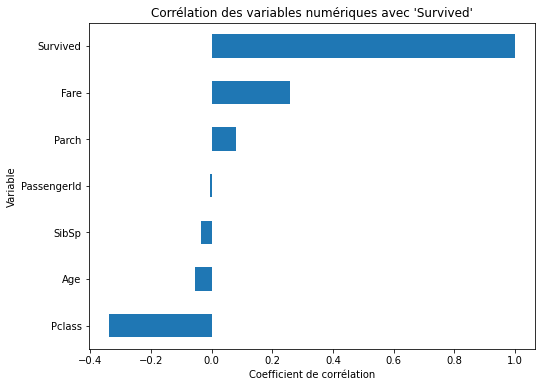

In [24]:
# Créer un graphique des corrélations avec les variables fortement corrélées en vert
import matplotlib.pyplot as plt
correlation_matrix['Survived'].sort_values().plot(kind="barh", figsize=(8, 6))
plt.title("Corrélation des variables numériques avec 'Survived'")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variable")

plt.show()

## Missing Value Ratio

In [135]:
missing_value_ratio_threshold = 0.4
missing_value_ratios = titanic_data.isnull().mean()
columns_to_drop = missing_value_ratios[missing_value_ratios > missing_value_ratio_threshold].index.tolist()

columns_to_drop

[]

`Cabin` column has nulls above 40% our threshold, we need to handle this in appreciate way!

## Chi-Square for Categorical Features

we usually use Chi-Sqaure with categorical features

identifions les variables catégorielles qui ont une relation statistiquement significative avec la variable cible "Survived" dans le jeu de données "Titanic".

In [25]:
# Importer le LabelEncoder de Scikit-learn
from sklearn.preprocessing import LabelEncoder

# Créer une instance du LabelEncoder
label_encoder = LabelEncoder()

df = df_sans_NA

# Itérer sur les variables catégorielles
for feature in categorical_features:
    # Encoder les variables catégorielles en nombres entiers
    # Convertir d'abord les valeurs en chaînes de caractères pour traiter correctement les valeurs nulles
    df[feature] = label_encoder.fit_transform(df[feature].astype(str))

# Effectuer un test du chi-carré entre les variables catégorielles et la variable cible "Survived"
chi2_stats, chi2_p_values = chi2(df[categorical_features], df['Survived'])

# Identifier les variables catégorielles ayant une relation statistiquement significative avec "Survived"
# (p-value < 0.05)
significant_chi2_features = [feature for feature, p_value in zip(categorical_features, chi2_p_values) if p_value < 0.05]

# Renvoyer la liste des variables catégorielles significatives
significant_chi2_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

significant_chi2_features renvoie la liste des variables catégorielles qui ont une relation statistiquement significative avec la variable cible "Survived".

In [26]:
pd.DataFrame({"Chi2-P-Values": chi2_p_values.round(8), "Chi2-Stats": chi2_stats})

,Chi2-P-Values,Chi2-Stats
0,0.000000,435.568915
1,0.000000,92.702447
2,0.000000,2871.655466
3,0.000000,284.482789
4,0.001402,10.202525


#### etapes de creation du model

Sélection des variables explicatives et de la variable cible : 

Vous avez déjà effectué cette étape, en sélectionnant les variables numériques (numerical_features) et catégorielles (categorical_features) dans le X, et la variable cible Survived dans y.


Conversion des variables catégorielles en variables indicatrices (dummies) : 

Vous avez également réalisé cette étape, en utilisant pd.get_dummies() sur le X.


Division des données en ensembles d'apprentissage et de test : 

Vous avez déjà divisé les données en X_train, X_test, y_train et y_test à l'aide de train_test_split().


Conversion des variables booléennes en entiers : 

Vous avez effectué cette étape pour préparer les données avant la modélisation.


Création du pipeline :

- StandardScaler() :
     Cette étape normalise les variables numériques pour faciliter l'apprentissage du modèle.

- LogisticRegression() : 
    Cette étape crée le modèle de régression logistique.


Entraînement du modèle :

pipeline.fit(X_train, y_train) : Cette ligne entraîne le modèle sur les données d'apprentissage.


Évaluation du modèle :
pipeline.score(X_test, y_test) : Cette ligne calcule l'accuracy (précision) du modèle sur les données de test.

`Name` column is not relevant with the target 

In [164]:
"""import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split


# Sélectionner les variables explicatives et la variable d'intérêt
X_sel1 = df_sans_NA[list(highly_correlated_features) + list(significant_chi2_features)]
y_sel1 = df_sans_NA['Survived']
"""




In [166]:
"""# Convertir les variables catégorielles en variables indicatrices (dummies)
X_sel1 = pd.get_dummies(X_sel1, columns=significant_chi2_features)

"""

In [167]:
"""
# Ajouter une constante pour l'interception
X_sel1 = sm.add_constant(X_sel1)
"""



In [168]:
"""
# Diviser les données en ensembles d'apprentissage et de test
X_train_sel1, X_test_sel1, y_train_sel1, y_test_sel1 = train_test_split(X_sel1, y_sel1, test_size=0.2, random_state=42)"""



In [169]:
"""

# Récupérer les noms des variables booléennes
bool_cols = X_train_sel1.select_dtypes(include='bool').columns

# Convertir les variables booléennes en entiers
for bool_col in bool_cols:
    X_train_sel1[bool_col] = X_train_sel1[bool_col].astype(int)
    X_test_sel1[bool_col] = X_test_sel1[bool_col].astype(int)"""

In [160]:
""""from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Créer le pipeline
pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression())
])

""""

In [161]:
"""# Entraîner le modèle sur les données d'apprentissage
pipeline.fit(X_train_sel1, y_train_sel1)
"""


Pipeline(steps=[('logistic_regression', LogisticRegression())])

In [163]:
"""# Évaluer les performances du modèle sur les données de test
accuracy = pipeline.score(X_test_sel1, y_test_sel1)
print(f'Accuracy on test set: {accuracy:.5f}')"""

Accuracy on test set: 1.00000


In [172]:
"""# Créer le modèle de régression logistique
logit_model_sel1 = sm.Logit(y_train_sel1, X_train_sel1)


"""

'# Créer le modèle de régression logistique\nlogit_model_sel1 = sm.Logit(y_train_sel1, X_train_sel1)\n\n\n'

In [173]:
"""# Ajuster le modèle aux données d'apprentissage
result_sel1 = logit_model_sel1.fit()

# Afficher le résumé des résultats de la régression
print(result_sel1.summary())"""

"# Ajuster le modèle aux données d'apprentissage\nresult_sel1 = logit_model_sel1.fit()\n\n# Afficher le résumé des résultats de la régression\nprint(result_sel1.summary())"

# Wrapper Methods

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [28]:
# Séparer les variables prédictives (X) et la variable cible (y)
X1 = df_sans_NA.drop(['Survived'], axis=1)  # Récupérer toutes les colonnes sauf 'Survived'
y1 = df_sans_NA['Survived']  # Récupérer la colonne 'Survived'

In [29]:
# Diviser le jeu de données en ensemble d'entraînement et de test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)  # 80% d'entraînement, 20% de test

## Forward Selection

In [30]:
# Définir le modèle de régression logistique
model1 = LogisticRegression()

# Sélectionner les 5 meilleures features avec RFE
rfe_forward1 = RFE(model1, n_features_to_select=5)  # Sélectionner les 5 meilleures features
X_train_forward1 = rfe_forward1.fit_transform(X_train1, y_train1)  # Transformer le jeu d'entraînement avec les features sélectionnées

In [31]:
# Entraîner le modèle sur les features sélectionnées
model1.fit(X_train_forward1, y_train1)

# Faire des prédictions sur l'ensemble d'entraînement avec les features sélectionnées
y_pred_forward1 = model1.predict(X_train_forward1)

In [32]:
# Calculer l'accuracy du modèle sur l'ensemble d'entraînement
accuracy_forward1 = accuracy_score(y_train1, y_pred_forward1)

# Récupérer les noms des features sélectionnées
selected_features_forward1 = X1.columns[rfe_forward1.support_]

In [33]:
# Afficher les résultats
print("Number of selected features:", rfe_forward1.n_features_)
print("Selected Features:", selected_features_forward1)
print("Model Accuracy:", accuracy_forward1)

Number of selected features: 5
Selected Features: Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')
Model Accuracy: 0.7963483146067416


with the selected features above the model give us around 80% acc on the training set

##### methode recurcive



In [34]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Définir le modèle de régression logistique
logit_model = LogisticRegression()

# Sélectionner les meilleures features avec RFECV
rfe_cv = RFECV(estimator=logit_model, step=1, cv=5, scoring='accuracy', n_jobs=-1)  # Sélectionner les meilleures features par validation croisée
rfe_cv.fit(X_train1, y_train1)  # Entraîner le modèle avec la sélection de features
X_train_selected_cv = rfe_cv.transform(X_train1)  # Transformer le jeu d'entraînement avec les features sélectionnées

/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ensai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [35]:
# Entraîner le modèle sur les features sélectionnées
logit_model.fit(X_train_selected_cv, y_train1)

# Faire des prédictions sur l'ensemble d'entraînement avec les features sélectionnées
y_pred_forward_cv = logit_model.predict(X_train_selected_cv)


In [36]:
# Calculer l'accuracy du modèle sur l'ensemble d'entraînement
accuracy_forward_cv = accuracy_score(y_train1, y_pred_forward_cv)

# Récupérer les noms des features sélectionnées
selected_features_forward_cv = X1.columns[rfe_cv.support_]

In [37]:
# Afficher les résultats
print("Number of selected features:", rfe_cv.n_features_)
print("Selected Features:", selected_features_forward_cv)
print("Model Accuracy:", accuracy_forward_cv)

Number of selected features: 8
Selected Features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')
Model Accuracy: 0.7991573033707865


In [38]:
# Faire des prédictions sur l'ensemble de test
X_test1_rfe = X_test1[selected_features_forward1]
X_test1_rfecv = X_test1[selected_features_forward_cv]



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind, wilcoxon

# Entraîner les deux modèles
model2 = LogisticRegression()
model2.fit(X_train_selected_cv, y_train1)

model1 = LogisticRegression()
model1.fit(X_train_forward1, y_train1)

# Faire des prédictions sur l'ensemble de test
y_pred2 = model2.predict(X_test1_rfecv)
y_pred1 = model1.predict(X_test1_rfe)

# Évaluer les performances
acc2 = accuracy_score(y_test1, y_pred2)
acc1 = accuracy_score(y_test1, y_pred1)

prec2 = precision_score(y_test1, y_pred2)
prec1 = precision_score(y_test1, y_pred1)

rec2 = recall_score(y_test1, y_pred2)
rec1 = recall_score(y_test1, y_pred1)

f12 = f1_score(y_test1, y_pred2)
f11 = f1_score(y_test1, y_pred1)

print("\nPerformances du modèle 1 (RFE sans validation croisée):")
print(f"Accuracy: {acc1:.2f}")
print(f"Precision: {prec1:.2f}")
print(f"Recall: {rec1:.2f}")
print(f"F1-score: {f11:.2f}")
print()

print("Performances du modèle 2 (RFE + validation croisée):")
print(f"Accuracy: {acc2:.2f}")
print(f"Precision: {prec2:.2f}")
print(f"Recall: {rec2:.2f}")
print(f"F1-score: {f12:.2f}")





Performances du modèle 1 (RFE sans validation croisée):
Accuracy: 0.77
Precision: 0.71
Recall: 0.76
F1-score: 0.73

Performances du modèle 2 (RFE + validation croisée):
Accuracy: 0.79
Precision: 0.75
Recall: 0.74
F1-score: 0.75


 Ces résultats suggèrent que le modèle 2, utilisant la sélection de features avec validation croisée, a de meilleures performances globales que le modèle 1 utilisant la sélection de features sans validation croisée.

L'accuracy plus élevée du modèle 2 indique qu'il fait de meilleures prédictions sur l'ensemble de test. La meilleure précision montre qu'il a moins de faux positifs, tandis que le rappel comparable indique qu'il détecte une proportion similaire de vrais positifs.

In [40]:
# Afficher les features sélectionnées par RFE et RFECV
print("Number of RFE Selected Features:", rfe_forward1.n_features_)
print("RFE Selected Features:", selected_features_forward1)
print()
print("Number of RFECV Selected Features:", rfe_cv.n_features_)
print("RFECV Selected Features:", selected_features_forward_cv)

Number of RFE Selected Features: 5
RFE Selected Features: Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

Number of RFECV Selected Features: 8
RFECV Selected Features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')


In [41]:

# Comparer les performances statistiquement
t_stat, p_value = ttest_ind(y_pred1, y_pred2)
print(f"\nTest t de Student, p-value: {p_value:.4f}")

w_stat, p_value = wilcoxon(y_pred1, y_pred2)
print(f"Test de Wilcoxon, p-value: {p_value:.4f}")


Test t de Student, p-value: 0.5225
Test de Wilcoxon, p-value: 0.0833


On peut conclure que la différence de performances entre les deux modèles n'est pas statistiquement significative.

En effet, pour le test t de Student, la p-value de 0.5225 est bien supérieure au seuil de significativité classique de 0.05. Cela signifie que l'on ne peut pas rejeter l'hypothèse nulle selon laquelle les performances moyennes des deux modèles sont identiques.

De même, pour le test de Wilcoxon, la p-value de 0.0833 est légèrement supérieure au seuil de 0.05, bien que très proche. Cela indique également que la différence de performances entre les deux modèles n'est pas statistiquement significative.

Donc, bien que le modèle 2 (avec sélection de features par RFE + validation croisée) semble avoir de meilleures performances que le modèle 1 (avec sélection de features par RFE sans validation croisée), cette différence n'est pas assez importante pour être considérée comme statistiquement significative.

Dans ce cas, on ne peut pas dire avec certitude qu'un des deux modèles est significativement meilleur que l'autre. Ils peuvent être considérés comme ayant des performances équivalentes.


## Backward Elimination

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind, wilcoxon

# Définir le modèle de régression logistique
logit_model = LogisticRegression()

In [63]:
# Sélection de features avec RFE sans validation croisée (Modèle 1)
# RFE (Recursive Feature Elimination) est une méthode de sélection de features
# qui élimine progressivement les features les moins importantes
rfe_backward = RFE(logit_model, n_features_to_select=5, step=1)
# Appliquer RFE sur les données d'entraînement et transformer X_train
X_train_backward = rfe_backward.fit_transform(X_train1, y_train1)

In [64]:
# Entraîner le modèle de régression logistique sur les données transformées
logit_model.fit(X_train_backward, y_train1)
# Faire des prédictions sur les données d'entraînement
y_pred_backward = logit_model.predict(X_train_backward)

In [65]:
# Calculer les métriques de performance du modèle 1
accuracy_backward = accuracy_score(y_train1, y_pred_backward)
precision_backward = precision_score(y_train1, y_pred_backward)
recall_backward = recall_score(y_train1, y_pred_backward)
f1_backward = f1_score(y_train1, y_pred_backward)


In [67]:
# Récupérer les features sélectionnées par RFE
selected_features_backward = [X1.columns[i] for i, selected in enumerate(rfe_backward.support_) if selected]
print("Number of RFE Selected Features:", len(selected_features_backward))
print("Selected Features:", selected_features_backward)

Number of RFE Selected Features: 5
Selected Features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


In [77]:

print("Performances du modèle 1 (RFE sans validation croisée):")
print(f"Accuracy: {accuracy_backward:.2f}")
print(f"Precision: {precision_backward:.2f}")
print(f"Recall: {recall_backward:.2f}")
print(f"F1-score: {f1_backward:.2f}")

Performances du modèle 1 (RFE sans validation croisée):
Accuracy: 0.80
Precision: 0.75
Recall: 0.69
F1-score: 0.72


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind, wilcoxon


# Filtrer X_test1 avec les features sélectionnées
X_test1_rfe_backward = X_test1[selected_features_backward]




In [70]:
# Entraîner les deux modèles
model2 = LogisticRegression()
model2.fit(X_train_selected_cv, y_train1)

model3 = LogisticRegression()
model3.fit(X_train_backward, y_train1)


# Faire des prédictions sur l'ensemble de test
y_pred2 = model2.predict(X_test1_rfecv)
y_pred3 = model3.predict(X_test1_rfe_backward)

# Évaluer les performances
acc2 = accuracy_score(y_test1, y_pred2)
acc3 = accuracy_score(y_test1, y_pred3)

prec2 = precision_score(y_test1, y_pred2)
prec3 = precision_score(y_test1, y_pred3)

rec2 = recall_score(y_test1, y_pred2)
rec3 = recall_score(y_test1, y_pred3)

f12 = f1_score(y_test1, y_pred2)
f13 = f1_score(y_test1, y_pred3)

print("\nPerformances du modèle 1 (RFE sans validation croisée):")
print(f"Accuracy: {acc3:.2f}")
print(f"Precision: {prec3:.2f}")
print(f"Recall: {rec3:.2f}")
print(f"F1-score: {f13:.2f}")
print()

print("Performances du modèle 2 (RFE + validation croisée):")
print(f"Accuracy: {acc2:.2f}")
print(f"Precision: {prec2:.2f}")
print(f"Recall: {rec2:.2f}")
print(f"F1-score: {f12:.2f}")




Performances du modèle 1 (RFE sans validation croisée):
Accuracy: 0.77
Precision: 0.71
Recall: 0.76
F1-score: 0.73

Performances du modèle 2 (RFE + validation croisée):
Accuracy: 0.79
Precision: 0.75
Recall: 0.74
F1-score: 0.75


same as previous the `backward elimination` is the reverse of `forward selection` process

# Embedded Methods (modele de regularisations)

### LASSO

In [71]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [78]:
# Standardiser les features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)


In [79]:
# Définir le modèle Lasso
lasso_model = Lasso(alpha=0.01, random_state=42)

# Entraîner le modèle Lasso sur les données d'entraînement
lasso_model.fit(X_train_scaled, y_train1)

Lasso(alpha=0.01, random_state=42)

In [80]:



# Faire des prédictions sur les données d'entraînement et de test
y_pred_train_lasso = lasso_model.predict(X_train_scaled)
y_pred_test_lasso = lasso_model.predict(X_test_scaled)

<AxesSubplot:>

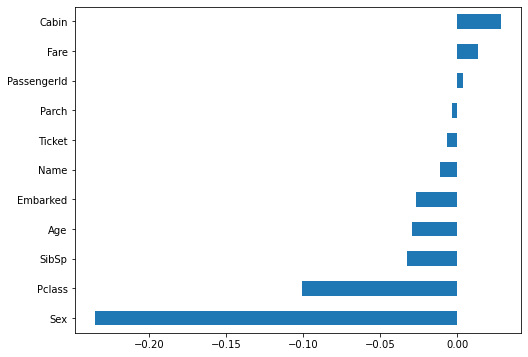

In [279]:

# Visualiser l'importance des features
feature_importances = pd.Series(lasso_model.coef_, index=X_train1.columns).sort_values()
feature_importances.plot(kind="barh", figsize=(8, 6))

Les features les plus importantes pour le modèle Lasso sont celles avec les coefficients les plus élevés (positifs ou négatifs).

Les features avec des coefficients proches de zéro sont considérées comme moins importantes pour le modèle.

Plus une barre est longue (en valeur absolue), plus la feature correspondante a un impact significatif sur les prédictions du modèle.

Les barres négatives indiquent que la feature a un impact négatif sur la variable cible.

Ce graphique vous permet d identifier les features les plus importantes pour le modèle Lasso, ce qui peut vous aider à mieux comprendre le modèle et à éventuellement affiner votre sélection de features.

as you can see that `PassengerID`, `Name`, and `Parch` is less coef to the model equation so deleting them will reduce the model complexity and make it easy to interprete

In [76]:
# Sélectionner les features les plus importantes
seuil_lasso = 0.01
lasso_selected_features = X_train1.columns[abs(lasso_model.coef_) > seuil_lasso ]
print("Number of LASSO Selected Features:", len(lasso_selected_features))
print("Selected Features:", lasso_selected_features)

Number of LASSO Selected Features: 8
Selected Features: Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Fare', 'Cabin', 'Embarked'], dtype='object')


In [96]:
# Entraîner à nouveau le modèle Elastic Net sur les features sélectionnées
X_train_lasso = X_train1[lasso_selected_features]
lasso_model.fit(X_train_lasso, y_train1)


Lasso(alpha=0.01, random_state=42)

In [97]:
# Faire des prédictions et évaluer la précision
y_pred_lasso = lasso_model.predict(X_train_lasso)
accuracy_lasso = accuracy_score(y_train1, (y_pred_lasso > 0.5).astype(int))
print("Model Accuracy:", accuracy_lasso)

Model Accuracy: 0.8019662921348315


### ELASTICNET

In [85]:
from sklearn.linear_model import ElasticNet
# Standardiser les features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)


In [86]:

# Définir le modèle Elastic Net
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)

# Entraîner le modèle Elastic Net sur les données d'entraînement
elastic_net_model.fit(X_train_scaled, y_train1)



ElasticNet(alpha=0.01, random_state=42)

In [87]:
# Faire des prédictions sur les données d'entraînement et de test
y_pred_train_elas_net = elastic_net_model.predict(X_train_scaled)
y_pred_test_elas_net = elastic_net_model.predict(X_test_scaled)


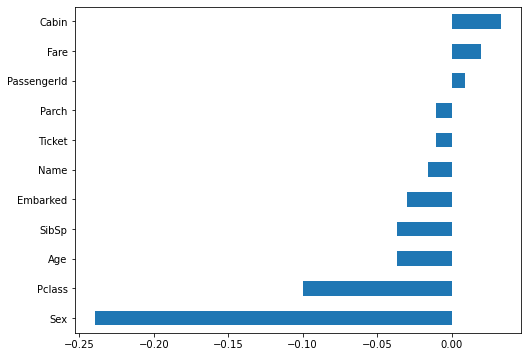

In [90]:

# Visualiser l'importance des features
feature_importances_elas_net = pd.Series(elastic_net_model.coef_, index=X_train1.columns).sort_values()
feature_importances_elas_net.plot(kind="barh", figsize=(8, 6));




In [91]:

# Sélectionner les features les plus importantes
seuil_lasso = 0.01
elastic_net_selected_features  = X_train1.columns[abs(elastic_net_model.coef_) > seuil_lasso ]
print("Number of Elastics_net Selected Features:", len(lasso_selected_features))
print("Selected Features:", elastic_net_selected_features)



Number of Elastics_net Selected Features: 8
Selected Features: Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [93]:

# Entraîner à nouveau le modèle Elastic Net sur les features sélectionnées
X_train_elastic_net = X_train1[elastic_net_selected_features]
elastic_net_model.fit(X_train_elastic_net, y_train1)


ElasticNet(alpha=0.01, random_state=42)

In [95]:

# Faire des prédictions et évaluer la précision
y_pred_elastic_net = elastic_net_model.predict(X_train_elastic_net)
accuracy_elastic_net = accuracy_score(y_train1, (y_pred_elastic_net > 0.5).astype(int))
print("Model Accuracy:", accuracy_elastic_net)

Model Accuracy: 0.8047752808988764


In [98]:

# Comparer les performances des deux modèles
if accuracy_elastic_net > accuracy_lasso:
    print("Le modèle Elastic Net a une meilleure performance que le modèle Lasso sur les données d'entrainement.")
elif accuracy_elastic_net < accuracy_lasso:
    print("Le modèle Lasso a une meilleure performance que le modèle Elastic Net sur les données d'entrainement.")
else:
    print("Les deux modèles ont des performances équivalentes.")

Le modèle Elastic Net a une meilleure performance que le modèle Lasso.


In [99]:
# Entraîner les deux modèles
model_lasso = Lasso(alpha=0.01, random_state=42)
model_lasso.fit(X_train_lasso, y_train1)

model_elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
model_elastic_net.fit(X_train_elastic_net, y_train1)

# Faire des prédictions sur l'ensemble de test
X_test_lasso = X_test1[lasso_selected_features]
y_pred_lasso = model_lasso.predict(X_test_lasso)

X_test_elastic_net = X_test1[elastic_net_selected_features]  
y_pred_elastic_net = model_elastic_net.predict(X_test_elastic_net)



In [100]:

# Évaluer les performances des modèles
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Modèle Lasso
accuracy_lasso = accuracy_score(y_test1, (y_pred_lasso > 0.5).astype(int))
f1_lasso = f1_score(y_test1, (y_pred_lasso > 0.5).astype(int))
precision_lasso = precision_score(y_test1, (y_pred_lasso > 0.5).astype(int))
recall_lasso = recall_score(y_test1, (y_pred_lasso > 0.5).astype(int))

print("Performances du modèle Lasso:")
print("Accuracy:", accuracy_lasso)
print("F1-score:", f1_lasso)
print("Precision:", precision_lasso)
print("Recall:", recall_lasso)

# Modèle Elastic Net
accuracy_elastic_net = accuracy_score(y_test1, (y_pred_elastic_net > 0.5).astype(int))
f1_elastic_net = f1_score(y_test1, (y_pred_elastic_net > 0.5).astype(int))
precision_elastic_net = precision_score(y_test1, (y_pred_elastic_net > 0.5).astype(int))
recall_elastic_net = recall_score(y_test1, (y_pred_elastic_net > 0.5).astype(int))

print("\nPerformances du modèle Elastic Net:")
print("Accuracy:", accuracy_elastic_net)
print("F1-score:", f1_elastic_net)
print("Precision:", precision_elastic_net)
print("Recall:", recall_elastic_net)


Performances du modèle Lasso:
Accuracy: 0.7877094972067039
F1-score: 0.7361111111111112
Precision: 0.7571428571428571
Recall: 0.7162162162162162

Performances du modèle Elastic Net:
Accuracy: 0.7988826815642458
F1-score: 0.75
Precision: 0.7714285714285715
Recall: 0.7297297297297297


In [101]:

# Comparer les performances des deux modèles
if accuracy_lasso > accuracy_elastic_net:
    print("\nLe modèle Lasso a de meilleures performances que le modèle Elastic Net.")
elif accuracy_lasso < accuracy_elastic_net:
    print("\nLe modèle Elastic Net a de meilleures performances que le modèle Lasso.")
else:
    print("\nLes deux modèles ont des performances équivalentes.")




Le modèle Elastic Net a de meilleures performances que le modèle Lasso.


In [105]:
#on peut et dois faire la validation croisée

"""from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# Définition des modèles
model_lasso = Lasso(alpha=0.01, random_state=42)
model_elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)

# Validation croisée pour le modèle Lasso
scores_lasso = cross_val_score(model_lasso, X_train1, y_train1, cv=5, scoring='scoring')
print("Scores Lasso (validation croisée) :", scores_lasso)
print("Moyenne des scores Lasso :", scores_lasso.mean())

# Validation croisée pour le modèle Elastic Net
scores_elastic_net = cross_val_score(model_elastic_net, X_train1, y_train1, cv=5, scoring='')
print("\nScores Elastic Net (validation croisée) :", scores_elastic_net)
print("Moyenne des scores Elastic Net :", scores_elastic_net.mean())"""

'from sklearn.linear_model import Lasso, ElasticNet\nfrom sklearn.model_selection import cross_val_score\n\n# Définition des modèles\nmodel_lasso = Lasso(alpha=0.01, random_state=42)\nmodel_elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)\n\n# Validation croisée pour le modèle Lasso\nscores_lasso = cross_val_score(model_lasso, X_train1, y_train1, cv=5, scoring=\'scoring\')\nprint("Scores Lasso (validation croisée) :", scores_lasso)\nprint("Moyenne des scores Lasso :", scores_lasso.mean())\n\n# Validation croisée pour le modèle Elastic Net\nscores_elastic_net = cross_val_score(model_elastic_net, X_train1, y_train1, cv=5, scoring=\'\')\nprint("\nScores Elastic Net (validation croisée) :", scores_elastic_net)\nprint("Moyenne des scores Elastic Net :", scores_elastic_net.mean())'

## Tree-based Feature Importance (Random Forest)

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Définition du modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Recherche des meilleurs hyperparamètres via GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train1, y_train1)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [108]:
# Entraînement du modèle avec les meilleurs hyperparamètres
best_rf_model = grid_search.best_estimator_



In [110]:
# Extraction des importances de features
feature_importances = best_rf_model.feature_importances_


In [111]:

# Sélection des features basée sur l'importance
tree_based_selected_features = X1.columns[feature_importances > 0.05]
X_train_tree_based = X_train1[tree_based_selected_features]
X_test_tree_based = X_test1[tree_based_selected_features]



In [112]:
# Entraînement du modèle final avec les features sélectionnées
best_rf_model.fit(X_train_tree_based, y_train1)



RandomForestClassifier(max_depth=15, random_state=42)

In [113]:
# Évaluation du modèle
y_pred_train = best_rf_model.predict(X_train_tree_based)
y_pred_test = best_rf_model.predict(X_test_tree_based)






In [119]:
"""import matplotlib.pyplot as plt

# Visualiser l'importance des features
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Tracer le graphique des importances de features
plt.figure(figsize=(8, 6))
feature_importances.plot(kind="barh")
plt.title("Importance des features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
"""




'import matplotlib.pyplot as plt\n\n# Visualiser l\'importance des features\nfeature_importances = pd.Series(best_rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)\n\n# Tracer le graphique des importances de features\nplt.figure(figsize=(8, 6))\nfeature_importances.plot(kind="barh")\nplt.title("Importance des features (Random Forest)")\nplt.xlabel("Importance")\nplt.ylabel("Features")\nplt.tight_layout()\nplt.show()\n'

In [ ]:

train_accuracy = accuracy_score(y_train1, y_pred_train)
test_accuracy = accuracy_score(y_test1, y_pred_test)


In [114]:
print("\nEmbedded Method 2: Tree-based Feature Importance (Random Forest)")
print("Selected Features:", tree_based_selected_features)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Embedded Method 2: Tree-based Feature Importance (Random Forest)
Selected Features: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin'],
      dtype='object')
Train Accuracy: 0.9985955056179775
Test Accuracy: 0.8324022346368715


Stay tuned for updates!